<a href="https://colab.research.google.com/github/domsjcsn/Linear-ALgebra---Python/blob/main/Assignment6_JOCSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Linear Algebra for ECE***

### Laboratory 6: Matrix Operations
Now that you have a fundamental knowledge about representing and operating with vectors as well as the fundamentals of matrices, we'll try to the same operations with matrices and even more

## **Objectives**

At the end of this activity you will be able to:
1. Be familiar with the fundamental matrix operations.
2. Apply the operations to solve intermediate equations.
3. Apply matrix algebra in engineering solutions.

## Discussion

In [127]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Transposition
One of the fundamental operations in matrix algebra is Transposition. The transpose of a matrix is done by flipping the values of its elements over its diagonals. With this, the rows and columns from the original matrix will be switched. So for a matrix $A$ its transpose is denoted as $A^T$. So for example:

$$A = \begin{bmatrix} 1 & 2 & 5\\5 & -1 &0 \\ 0 & -3 & 3\end{bmatrix} $$

$$ A^T = \begin{bmatrix} 1 & 5 & 0\\2 & -1 &-3 \\ 5 & 0 & 3\end{bmatrix}$$

This can now be achieved programmatically by using np.transpose() or by using the T method.

In [128]:
A = np.array([
    [1 ,2, 5],
    [5, -1, 0],
    [0, -3, 3]
])
A

array([[ 1,  2,  5],
       [ 5, -1,  0],
       [ 0, -3,  3]])

In [129]:
AT1 = np.transpose(A)
AT1

array([[ 1,  5,  0],
       [ 2, -1, -3],
       [ 5,  0,  3]])

In [130]:
AT2 = A.T
AT2

array([[ 1,  5,  0],
       [ 2, -1, -3],
       [ 5,  0,  3]])

In [131]:
np.array_equiv(AT1, AT2)

True

In [132]:
B = np.array([
    [1,2,3,4],
    [1,0,2,1],
])
B.shape

(2, 4)

In [133]:
np.transpose(B).shape

(4, 2)

In [134]:
B.T.shape

(4, 2)

Try to create your own matrix (you can try non-squares) to test transposition.

In [135]:
doms = np.array([
     [3,2,1],
     [7,6,5]

])
doms.shape

(2, 3)

In [136]:
np.transpose(doms).shape

(3, 2)

In [137]:
doms.T.shape

(3, 2)

In [138]:
domsT = doms.T
doms.T

array([[3, 7],
       [2, 6],
       [1, 5]])

## Dot Product / Inner Product

If you recall the dot product from laboratory activity before, we will try to implement the same operation with matrices. In matrix dot product we are going to get the sum of products of the vectors by row-column pairs. So if we have two matrices $X$ and $Y$:

$$X = \begin{bmatrix}x_{(0,0)}&x_{(0,1)}\\ x_{(1,0)}&x_{(1,1)}\end{bmatrix}, Y = \begin{bmatrix}y_{(0,0)}&y_{(0,1)}\\ y_{(1,0)}&y_{(1,1)}\end{bmatrix}$$

The dot product will then be computed as:
$$X \cdot Y= \begin{bmatrix} x_{(0,0)}*y_{(0,0)} + x_{(0,1)}*y_{(1,0)} & x_{(0,0)}*y_{(0,1)} + x_{(0,1)}*y_{(1,1)} \\  x_{(1,0)}*y_{(0,0)} + x_{(1,1)}*y_{(1,0)} & x_{(1,0)}*y_{(0,1)} + x_{(1,1)}*y_{(1,1)}
\end{bmatrix}$$

So if we assign values to $X$ and $Y$:
$$X = \begin{bmatrix}1&2\\ 0&1\end{bmatrix}, Y = \begin{bmatrix}-1&0\\ 2&2\end{bmatrix}$$

$$X \cdot Y= \begin{bmatrix} 1*-1 + 2*2 & 1*0 + 2*2 \\  0*-1 + 1*2 & 0*0 + 1*2 \end{bmatrix} = \begin{bmatrix} 3 & 4 \\2 & 2 \end{bmatrix}$$
This could be achieved programmatically using `np.dot()`, `np.matmul()` or the `@` operator.

In [139]:
X = np.array([
    [1,2],
    [0,1]
])
Y = np.array([
    [-1,0],
    [2,2]
])

In [140]:
np.dot(X,Y)

array([[3, 4],
       [2, 2]])

In [141]:
X.dot(Y)

array([[3, 4],
       [2, 2]])

In [142]:
X @ Y

array([[3, 4],
       [2, 2]])

In [143]:
np.matmul(X,Y)

array([[3, 4],
       [2, 2]])

### Sample

In [144]:
doms1 = np.array([
    [3,2,1],
    [6,5,4],
    [9,8,7]              
])

doms2 = np.array([
    [7,8,9],
    [4,5,6],
    [1,2,3]              
])
np.dot(doms1,doms2)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [145]:
doms1.dot(doms2)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [146]:
doms1 @ doms2

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [147]:
np.matmul(doms1,doms2)

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In matrix dot products there are additional rules compared with vector dot products. Since vector dot products were just in one dimension there are less restrictions. Since now we are dealing with Rank 2 vectors we need to consider some rules:

### Rule 1: The inner dimensions of the two matrices in question must be the same. 

So given a matrix $A$ with a shape of $(a,b)$ where $a$ and $b$ are any integers. If we want to do a dot product between $A$ and another matrix $B$, then matrix $B$ should have a shape of $(b,c)$ where $b$ and $c$ are any integers. So for given the following matrices:

$$A = \begin{bmatrix}2&4\\5&-2\\0&1\end{bmatrix}, B = \begin{bmatrix}1&1\\3&3\\-1&-2\end{bmatrix}, C = \begin{bmatrix}0&1&1\\1&1&2\end{bmatrix}$$

So in this case $A$ has a shape of $(3,2)$, $B$ has a shape of $(3,2)$ and $C$ has a shape of $(2,3)$. So the only matrix pairs that is eligible to perform dot product is matrices $A \cdot C$, or $B \cdot C$.  

In [148]:
A = np.array([
    [2,4],
    [5,-2],
    [0,1]
])
B = np.array([
    [1,1],
    [3,3],
    [-1,-2]
])
C = np.array([
    [0,1,1],
    [1,1,2]
])
print(A.shape)
print(B.shape)
print(A.shape)

(3, 2)
(3, 2)
(3, 2)


In [149]:
A @ C

array([[ 4,  6, 10],
       [-2,  3,  1],
       [ 1,  1,  2]])

In [150]:
B @ C

array([[ 1,  2,  3],
       [ 3,  6,  9],
       [-2, -3, -5]])

If you would notice the shape of the dot product changed and its shape is not the same as any of the matrices we used. The shape of a dot product is actually derived from the shapes of the matrices used. So recall matrix $A$ with a shape of $(a,b)$ and matrix $B$ with a shape of $(b,c)$, $A \cdot B$ should have a shape $(a,c)$.

In [151]:
A @ B.T

array([[  6,  18, -10],
       [  3,   9,  -1],
       [  1,   3,  -2]])

In [152]:
X = np.array([
    [1,2,3,0]
])
Y = np.array([
    [1,0,4,-1]
])
print(X.shape)
print(Y.shape)

(1, 4)
(1, 4)


In [153]:
Y.T @ X

array([[ 1,  2,  3,  0],
       [ 0,  0,  0,  0],
       [ 4,  8, 12,  0],
       [-1, -2, -3,  0]])

In [154]:
X @ Y.T

array([[13]])

And youcan see that when you try to multiply A and B, it returns `ValueError` pertaining to matrix shape mismatch.

### Rule 2: Dot Product has special properties

Dot products are prevalent in matrix algebra, this implies that it has several unique properties and it should be considered when formulation solutions:
 1. $A \cdot B \neq B \cdot A$
 2. $A \cdot (B \cdot C) = (A \cdot B) \cdot C$
 3. $A\cdot(B+C) = A\cdot B + A\cdot C$
 4. $(B+C)\cdot A = B\cdot A + C\cdot A$
 5. $A\cdot I = A$
 6. $A\cdot \emptyset = \emptyset$ 

In [155]:
A = np.array([
    [4,3,1],
    [5,3,5],
    [5,0,4]
])
B = np.array([
    [1,2,3],
    [4,3,1],
    [9,1,1]
])
C = np.array([
    [2,3,6],
    [5,7,8],
    [1,2,1]
])

In [156]:
np.array_equal(A@B, B@A)

False

In [157]:
E = A @ (B @ C)
E

array([[156, 233, 310],
       [267, 400, 587],
       [171, 259, 377]])

In [158]:
F = (A @ B) @ C
F

array([[156, 233, 310],
       [267, 400, 587],
       [171, 259, 377]])

In [159]:
np.array_equiv(E, F)

True

In [160]:
AB = np.dot(A,B)
AB

array([[25, 18, 16],
       [62, 24, 23],
       [41, 14, 19]])

In [161]:
BA = np.dot(B,A)
BA

array([[29,  9, 23],
       [36, 21, 23],
       [46, 30, 18]])

In [162]:
np.array_equiv(AB,BA)

False

In [163]:
BC= np.dot(B,C)
BC

array([[15, 23, 25],
       [24, 35, 49],
       [24, 36, 63]])

In [164]:
ABC= np.dot(A,BC)
ABC

array([[156, 233, 310],
       [267, 400, 587],
       [171, 259, 377]])

In [165]:
ABC1 = np.dot(AB,C)
ABC1

array([[156, 233, 310],
       [267, 400, 587],
       [171, 259, 377]])

In [166]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [167]:
A.dot(np.eye(3))

array([[4., 3., 1.],
       [5., 3., 5.],
       [5., 0., 4.]])

## Determinant

A determinant is a scalar value derived from a square matrix. The determinant is a fundamental and important value used in matrix algebra. Although it will not be evident in this laboratory on how it can be used practically, but it will be reatly used in future lessons.

The determinant of some matrix $A$ is denoted as $det(A)$ or $|A|$. So let's say $A$ is represented as:
$$A = \begin{bmatrix}a_{(0,0)}&a_{(0,1)}\\a_{(1,0)}&a_{(1,1)}\end{bmatrix}$$
We can compute for the determinant as:
$$|A| = a_{(0,0)}*a_{(1,1)} - a_{(1,0)}*a_{(0,1)}$$
So if we have $A$ as:
$$A = \begin{bmatrix}1&4\\0&3\end{bmatrix}, |A| = 3$$

But you might wonder how about square matrices beyond the shape $(2,2)$? We can approach this problem by using several methods such as co-factor expansion and the minors method. This can be taught in the lecture of the laboratory but we can achieve the strenuous computation of high-dimensional matrices programmatically using Python. We can achieve this by using `np.linalg.det()`.

In [168]:
A = np.array([
    [1,4],
    [0,3]
])
np.linalg.det(A)

3.0000000000000004

In [169]:
B = np.array([
              [1, 5, 2],
              [3, -1 ,-1],
              [0, -2, 1]
])
np.linalg.det(B)

-30.000000000000014

In [170]:
## Now other mathematics classes would require you to solve this by hand, 
## and that is great for practicing your memorization and coordination skills 
## but in this class we aim for simplicity and speed so we'll use programming
## but it's completely fine if you want to try to solve this one by hand.
B = np.array([
    [1,3,5,6],
    [0,3,1,3],
    [3,1,8,2],
    [5,2,6,8]
])
np.linalg.det(B)

-235.0000000000002

## ***Inverse***
The inverse of a matrix is another fundamental operation in matrix algebra. Determining the inverse of a matrix let us determine if its solvability and its characteristic as a system of linear equation — we'll expand on this in the nect module. Another use of the inverse matrix is solving the problem of divisibility between matrices. Although element-wise division exists but dividing the entire concept of matrices does not exists. Inverse matrices provides a related operation that could have the same concept of "dividing" matrices.

Now to determine the inverse of a matrix we need to perform several steps. So let's say we have a matrix $M$:
$$M = \begin{bmatrix}1&7\\-3&5\end{bmatrix}$$
First, we need to get the determinant of $M$.
$$|M| = (1)(5)-(-3)(7) = 26$$
Next, we need to reform the matrix into the inverse form:
$$M^{-1} = \frac{1}{|M|} \begin{bmatrix} m_{(1,1)} & -m_{(0,1)} \\ -m_{(1,0)} & m_{(0,0)}\end{bmatrix}$$
So that will be:
$$M^{-1} = \frac{1}{26} \begin{bmatrix} 5 & -7 \\ 3 & 1\end{bmatrix} = \begin{bmatrix} \frac{5}{26} & \frac{-7}{26} \\ \frac{3}{26} & \frac{1}{26}\end{bmatrix}$$
For higher-dimension matrices you might need to use co-factors, minors, adjugates, and other reduction techinques. To solve this programmatially we can use `np.linalg.inv()`.

In [171]:
M = np.array([
    [1,7],
    [-3, 5]
])

np.array(M @ np.linalg.inv(M), dtype=int)

array([[1, 0],
       [0, 1]])

In [172]:
P = np.array([
              [6, 9, 0],
              [4, 2, -1],
              [3, 6, 7]
])
Q = np.linalg.inv(P)
Q

array([[-0.12578616,  0.39622642,  0.05660377],
       [ 0.19496855, -0.26415094, -0.03773585],
       [-0.11320755,  0.05660377,  0.1509434 ]])

In [173]:
P @ Q

array([[ 1.00000000e+00, -5.55111512e-17, -6.93889390e-18],
       [ 8.32667268e-17,  1.00000000e+00, -2.77555756e-17],
       [ 2.77555756e-17, -1.38777878e-17,  1.00000000e+00]])

In [174]:
## And now let's test your skills in solving a matrix with high dimensions:
N = np.array([
    [18,5,23,1,0,33,5],
    [0,45,0,11,2,4,2],
    [5,9,20,0,0,0,3],
    [1,6,4,4,8,43,1],
    [8,6,8,7,1,6,1],
    [-5,15,2,0,0,6,-30],
    [-2,-5,1,2,1,20,12],
])
N_inv = np.linalg.inv(N)
np.array(N @ N_inv,dtype=int)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]])

To validate the wether if the matric that you have solved is really the inverse, we follow this dot product property for a matrix $M$:
$$M\cdot M^{-1} = I$$

In [175]:
squad = np.array([
    [1.0, 1.0, 0.5],
    [0.7, 0.7, 0.9],
    [0.3, 0.3, 1.0]
])
weights = np.array([
    [0.2, 0.2, 0.6]
])
p_grade = squad @ weights.T
p_grade


array([[0.7 ],
       [0.82],
       [0.72]])

# ***ACTIVITY***

## **Task 1**
Prove and implement the remaining 6 matrix multiplication properties. You may create your own matrices in which their shapes should not be lower than  (3,3) . In your methodology, create individual flowcharts for each property and discuss the property you would then present your proofs or validity of your implementation in the results section by comparing your result to present functions from NumPy.

In [176]:
A = np.array([
    [6,9,6],
    [0,4,2],
    [8,1,1]     
])

B = np.array([
    [5,2,4],
    [7,1,3],
    [5,4,4]          
])

C = np.array([
    [7,6,8],
    [1,3,4],
    [5,5,3]          

])

In [177]:
#1 
A1 = A@B
A1

array([[123,  45,  75],
       [ 38,  12,  20],
       [ 52,  21,  39]])

In [178]:
B1 = B@A
B1

array([[62, 57, 38],
       [66, 70, 47],
       [62, 65, 42]])

In [179]:
np.array_equal(A1,B1)

False

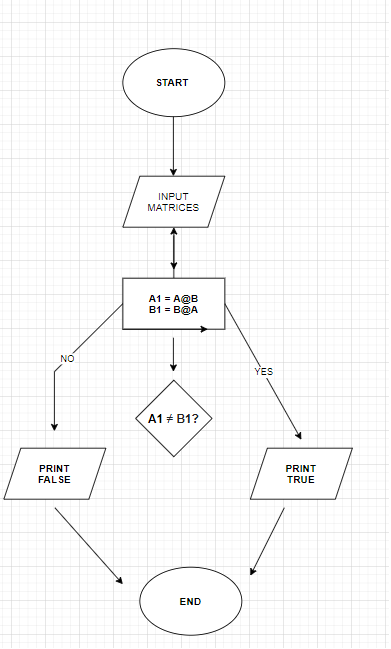

In [180]:
#2
A2 = A @ (B @ C)
A2

array([[1281, 1248, 1389],
       [ 378,  364,  412],
       [ 580,  570,  617]])

In [181]:
B2 = (A @ B) @ C
B2

array([[1281, 1248, 1389],
       [ 378,  364,  412],
       [ 580,  570,  617]])

In [182]:
np.array_equal(A2,B2)

True

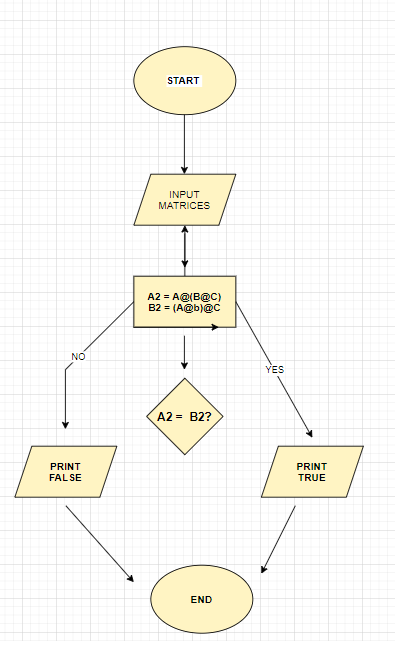

In [183]:
#3
A3 = A @ (B + C)
A3

array([[204, 138, 177],
       [ 52,  34,  42],
       [114,  77, 110]])

In [184]:
B3 = A @ B + A @ C
B3

array([[204, 138, 177],
       [ 52,  34,  42],
       [114,  77, 110]])

In [185]:
np.array_equal(A3,B3)

True

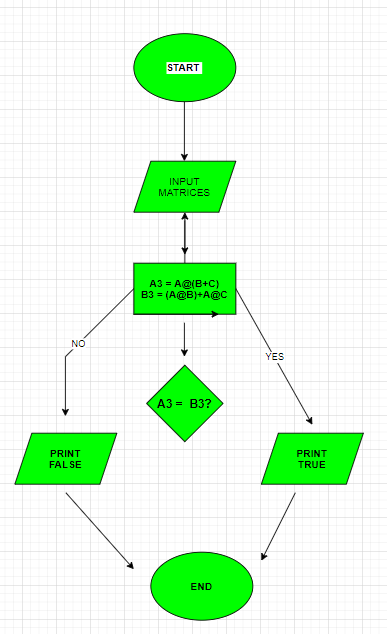

In [186]:
#4
A4 = (B + C) @ A
A4

array([[168, 152, 100],
       [104,  95,  63],
       [116, 133,  85]])

In [187]:
B4 = B @ A + C @ A
B4

array([[168, 152, 100],
       [104,  95,  63],
       [116, 133,  85]])

In [188]:
np.array_equal(A4,B4)

True

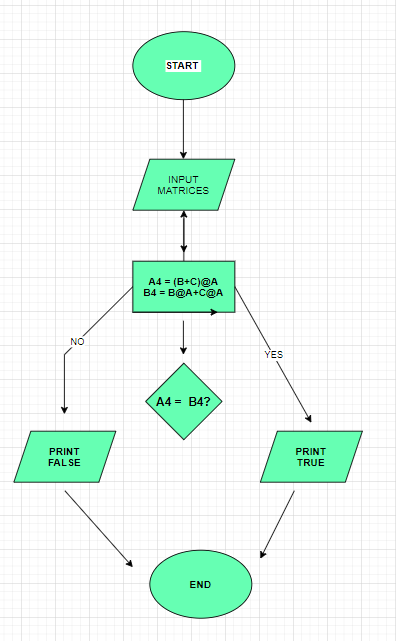

In [195]:
#5
A5 = A@B5
A5

array([[6., 9., 6.],
       [0., 4., 2.],
       [8., 1., 1.]])

In [193]:
B5 = np.eye(3)
B5

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [196]:
np.array_equal(A5,B5)

False

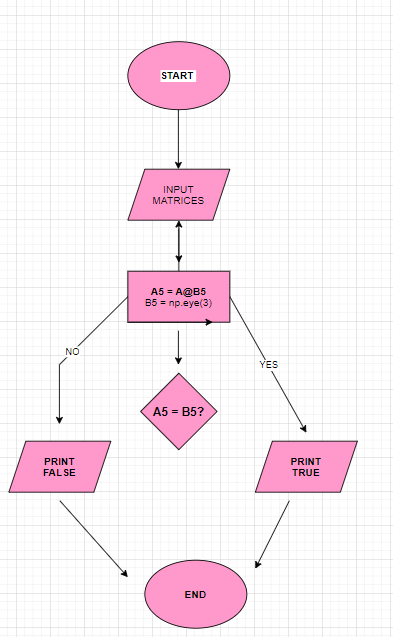

In [ ]:
#6
A6 = np.zeros(A.shape)
A6

In [ ]:
B6 = A.dot(np.zeros(A.shape))
B6

In [ ]:
np.array_equal(A6,B6)

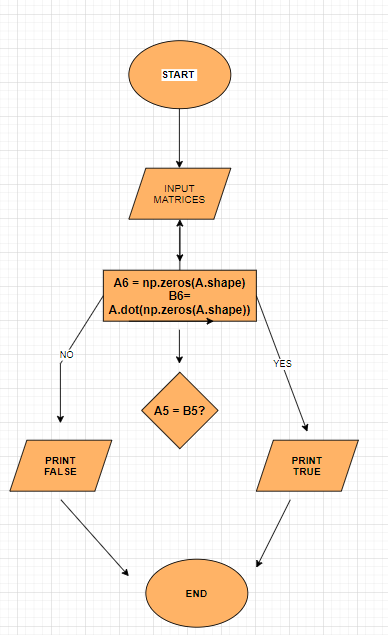

## ***CONCLUSION***
For your conclusion synthesize the concept and application of the laboratory. Briefly discuss what you have learned and achieved in this activity.

***The students found out that this laboratory experiment and our last experiment are alike. Both experiment talks about matrixes and operations. But the difference is that this laboratory experiment emphasized Dot Product, Determinant, Transposition, and Inverse. Through this laboratory experiment, the students are able to prove the six given equations given regarding the topics that our professor discussed to us. Finally, this activity made the students' understanding of matrices and their operations broader.***